# Initialize

In [1]:
# set path for source files
import sys
src_files_path = "../src/"
if src_files_path not in sys.path:
    sys.path.append(src_files_path)


# required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# custom scripts
import data
import utils
import plots

data_prep = data.DataPrepare("../data")
util_handle = utils.Utils()
plot_handle = plots.Plot()

Your data root path : ../data


In [2]:
lot1 = [
    "FOODS_1_089", "FOODS_2_209", "FOODS_3_090", "HOUSEHOLD_1_394",
    "HOUSEHOLD_2_343", "HOBBIES_1_236", "HOBBIES_2_109"
]

lot2 = [
    "FOODS_1_145", "FOODS_2_129", "FOODS_3_602", "HOUSEHOLD_1_511",
    "HOUSEHOLD_2_369", "HOBBIES_1_345", "HOBBIES_2_077"
]

data_eda = data_prep.prepare_data(eda=True, eda_params={"keep_items": lot1, "save_name":'eda_lot1'})
df_cal = data_eda['calendar']


data_eda.keys()

Loading ../data/processed/data_melted.bin
Loading ../data/processed/eda_lot1.bin


dict_keys(['calendar', 'sell_prices', 'submission_melted', 'lot_data'])

In [3]:
lot1_data = data_eda['lot_data']
lot1_keys = list(lot1_data.keys())

# FOODS_3_090

In [4]:
# get item from lot_data
key = lot1_keys[2] # FOODS_3_090
df_part = lot1_data[key]

## Per day sale of an item

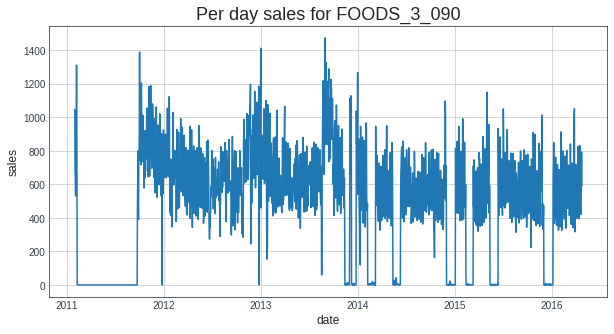

Per day sales for FOODS_3_090 Heatmap


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


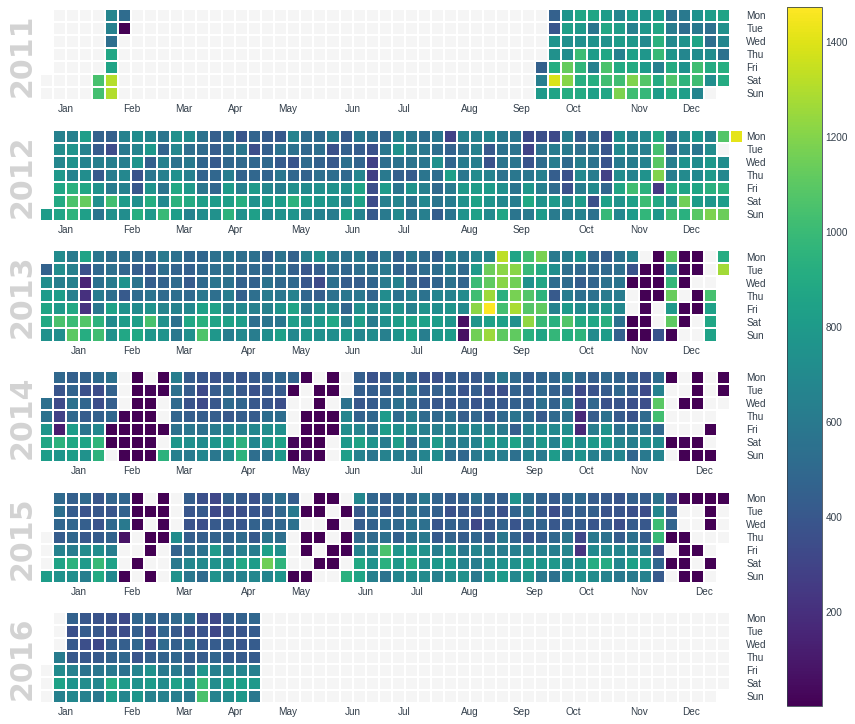

In [5]:
plot_handle.view_per_day_sale_item(df_part, df_cal, item_name=key)

## Per day sale of each store for an item

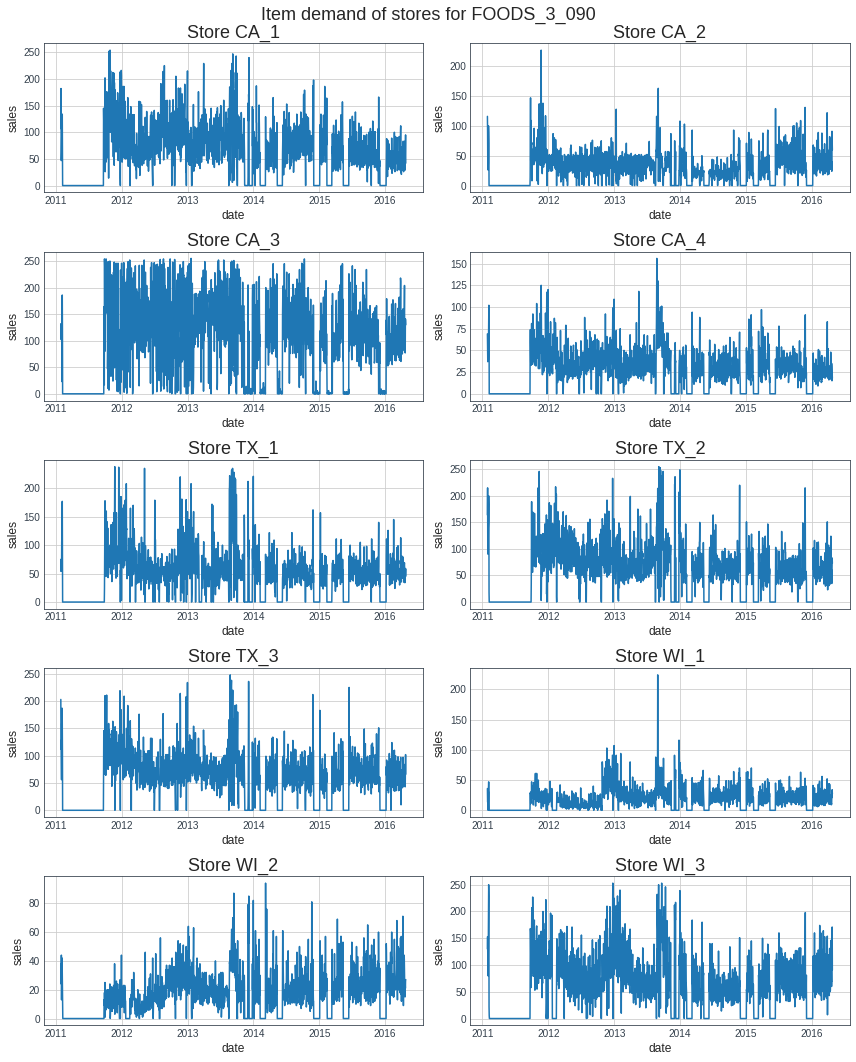

In [6]:
plot_handle.view_item_sales_store(df_part, df_cal, key)

## Average item sales over a period

### Weekly average

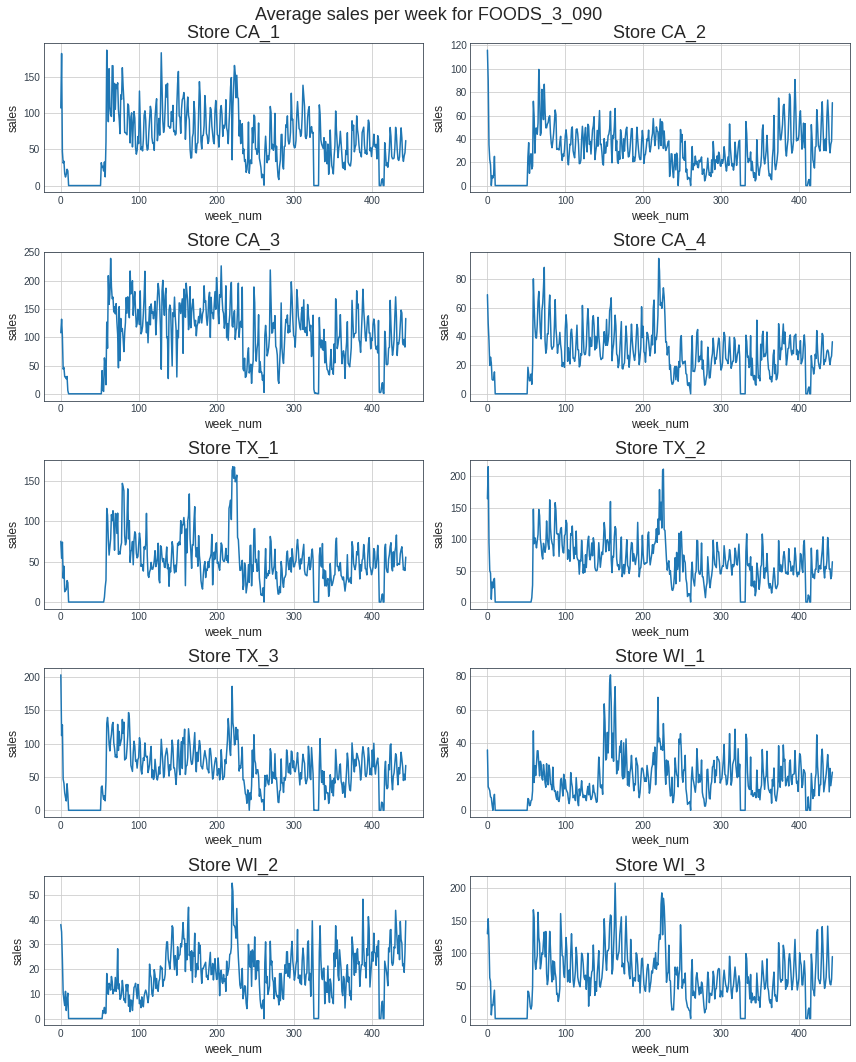

In [7]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='week', item_name=key)

### Monthly average

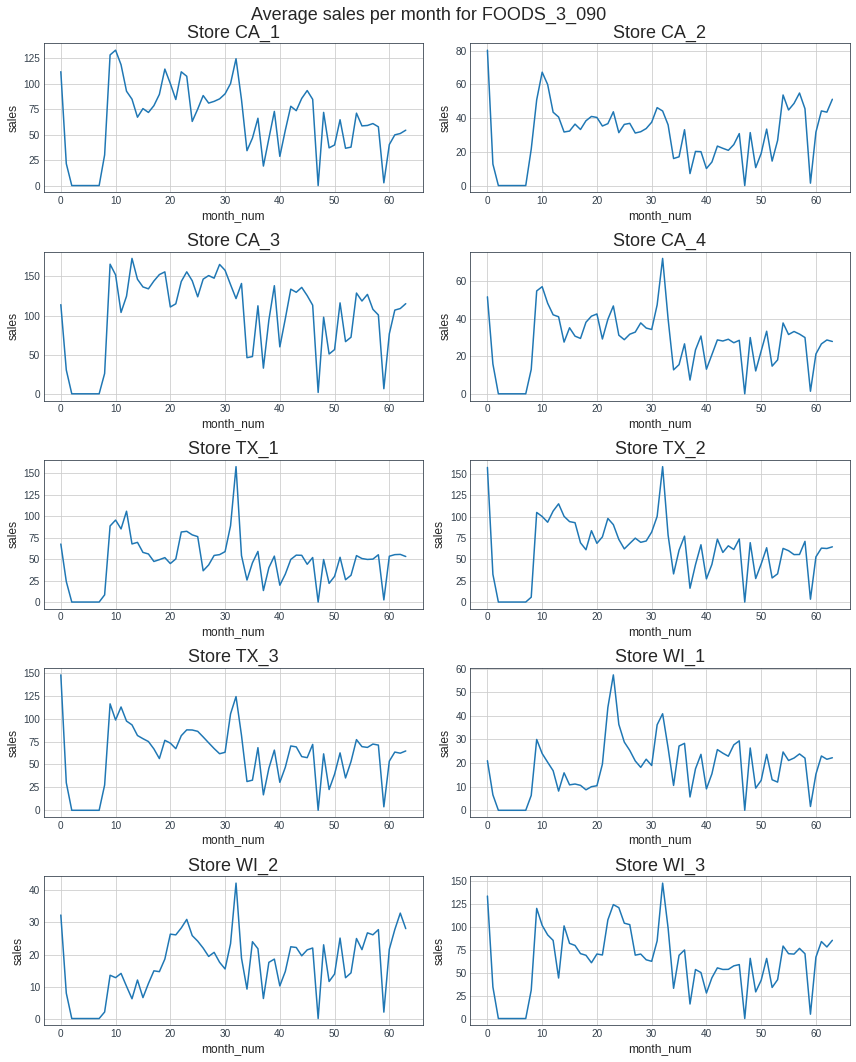

In [8]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='month', item_name=key)

## Yearly average

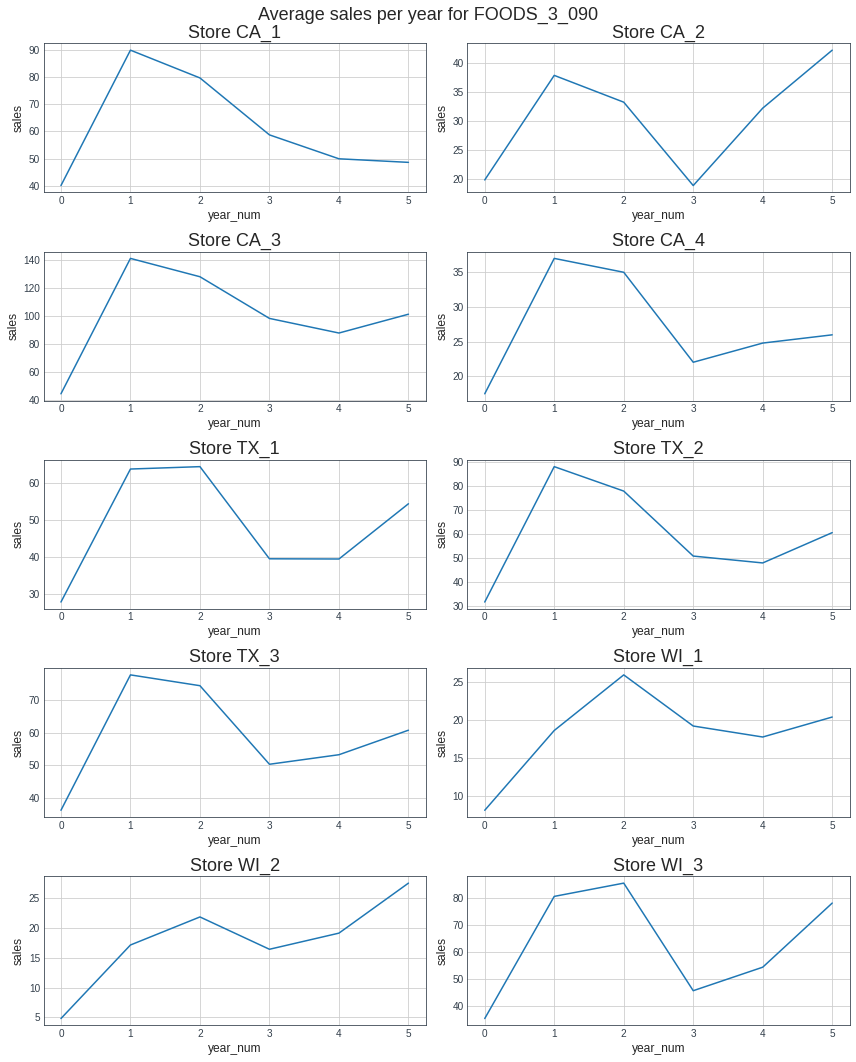

In [9]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='year', item_name=key)

# HOUSEHOLD_1_394

In [30]:
# get item from lot_data
key = lot1_keys[3] # HOUSEHOLD_1_394
df_part = lot1_data[key]

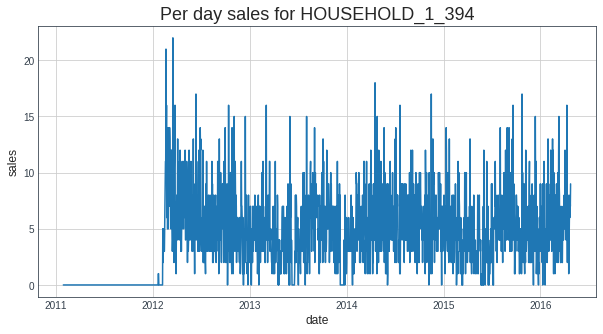

In [34]:
def view_per_day_sale_item(self,
                               df: pd.DataFrame,
                               df_cal: pd.DataFrame,
                               item_name: str = "___",
                               view_calplot=True):
        """
        Visualize sales of item across each store

        Args:
            df (pd.DataFrame): DataFrame with details of sales of an item
            df_cal (pd.DataFrame) : calendar DataFrame
            item_name (str, optional): Name of item being analyzed. Defaults to "___".
            view_calplot (bool, optional) : View calendar heatmap. Defaults to True. 
        """

        # group by days and sum all sales of that day for that item
        res = df.groupby(by='day')['sales'].agg('sum').reset_index()

        # sort by days
        res['day'] = res['day'].str.replace('d_', '').astype(int)
        res.sort_values(by='day', inplace=True)

        res['day'] = 'd_' + res['day'].astype(str)

        # merge on calendar
        res = res.merge(right=df_cal, how='left', left_on='day', right_on='d')

        # convert to datetime
        res['date'] = pd.to_datetime(
            res['date'], format="%Y-%m-%d", errors='coerce').apply(lambda x: )

        plt.figure(figsize=[10, 5])
        plt.title(f"Per day sales for {item_name}")
        sns.lineplot(
            x='date',
            y='sales',
            data=res,
        )
        plt.show()

        return res
res = view_per_day_sale_item(0, df_part, df_cal, key)

In [35]:
res

,day,sales,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,d_2,0,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,d_3,0,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,d_4,0,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,d_5,0,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,d_1909,7,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0
1909,d_1910,6,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0
1910,d_1911,8,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0
1911,d_1912,7,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0


In [58]:
from plotnine import * # use python's ggplot2
( 
  ggplot(res, aes('monthweek','weekdays',fill = 'val')) +
  geom_tile(color ='gray') +
  geom_text(aes(label = 'mday'),size=5,color = 'black')+
  facet_wrap('~month' ,nrow=3) +
  #scale_fill_gradient(low="red", high="yellow") +
  labs(title = 'Record',x='week of month',y = ' ',fill = 'Times') + 
  scale_x_continuous() 
)

PlotnineError: "Could not evaluate the 'fill' mapping: 'val' (original error: name 'val' is not defined)"

## Per day sale of an item

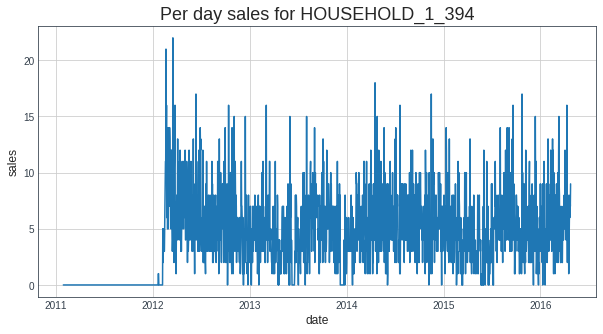

In [63]:
def view_per_day_sale_item(self,
                           df: pd.DataFrame,
                           df_cal: pd.DataFrame,
                           item_name: str = "___",
                           view_calplot=True):
    """
    Visualize sales of item across each store

    Args:
        df (pd.DataFrame): DataFrame with details of sales of an item
        df_cal (pd.DataFrame) : calendar DataFrame
        item_name (str, optional): Name of item being analyzed. Defaults to "___".
        view_calplot (bool, optional) : View calendar heatmap. Defaults to True. 
    """

    # group by days and sum all sales of that day for that item
    res = df.groupby(by='day')['sales'].agg('sum').reset_index()

    # sort by days
    res['day'] = res['day'].str.replace('d_', '').astype(int)
    res.sort_values(by='day', inplace=True)

    res['day'] = 'd_' + res['day'].astype(str)

    # merge on calendar
    res = res.merge(right=df_cal, how='left', left_on='day', right_on='d')

    # convert to datetime
    res['date'] = pd.to_datetime(
        res['date'], format="%Y-%m-%d", errors='coerce')

    plt.figure(figsize=[10, 5])
    plt.title(f"Per day sales for {item_name}")
    sns.lineplot(
        x='date',
        y='sales',
        data=res,
    )
    plt.show()

    return res
    if view_calplot:
        temp = res
        events = temp[['date', 'sales']]
        events.set_index(keys=['date'], inplace=True)
        events = events['sales']

        print(f"Per day sales for {item_name} Heatmap")

        calplot.calplot(events, )
        plt.show()
import calplot
e = view_per_day_sale_item(plot_handle, df_part, df_cal, item_name=key)
# plot_handle.view_per_day_sale_item(df_part, df_cal, item_name=key)

# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.zeros((7, num_weeks))
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = series.get(date, 0)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax


def date_heatmap_demo():
    '''An example for `date_heatmap`.

    Most of the sizes here are chosen arbitrarily to look nice with 1yr of
    data. You may need to fiddle with the numbers to look right on other data.
    '''
    # Get some data, a series of values with datetime index.
    data = np.random.randint(5, size=365)
    data = pd.Series(data)
    data.index = pd.date_range(start='2017-01-01', end='2017-12-31', freq='1D')

    # Create the figure. For the aspect ratio, one year is 7 days by 53 weeks.
    # We widen it further to account for the tick labels and color bar.
    figsize = plt.figaspect(7 / 56)
    fig = plt.figure(figsize=figsize)

    # Plot the heatmap with a color bar.
    ax = date_heatmap(data, edgecolor='black')
    plt.colorbar(ticks=range(5), pad=0.02)

    # Use a discrete color map with 5 colors (the data ranges from 0 to 4).
    # Extending the color limits by 0.5 aligns the ticks in the color bar.
    cmap = mpl.cm.get_cmap('Blues', 5)
    plt.set_cmap(cmap)
    plt.clim(-0.5, 4.5)

    # Force the cells to be square. If this is set, the size of the color bar
    # may look weird compared to the size of the heatmap. That can be corrected
    # by the aspect ratio of the figure or scale of the color bar.
    ax.set_aspect('equal')

    # Save to a file. For embedding in a LaTeX doc, consider the PDF backend.
    # http://sbillaudelle.de/2015/02/23/seamlessly-embedding-matplotlib-output-into-latex.html
    fig.savefig('heatmap.pdf', bbox_inches='tight')

    # The firgure must be explicitly closed if it was not shown.
    plt.close(fig)

NameError: name 'e' is not defined

In [69]:
events

date
2011-01-29    0
2011-01-30    0
2011-01-31    0
2011-02-01    0
2011-02-02    0
             ..
2016-04-20    7
2016-04-21    6
2016-04-22    8
2016-04-23    7
2016-04-24    9
Length: 1913, dtype: uint8

In [65]:
temp = e
events = temp['sales'].values
events = pd.Series(events, index=temp['date'])
events

date
2011-01-29    0
2011-01-30    0
2011-01-31    0
2011-02-01    0
2011-02-02    0
             ..
2016-04-20    7
2016-04-21    6
2016-04-22    8
2016-04-23    7
2016-04-24    9
Length: 1913, dtype: uint8

In [52]:
import datetime

In [79]:
idx = pd.date_range(start='2010-12-31', end='2016-04-24')
events = events.reindex(idx, fill_value=0)

KeyError: '2010'

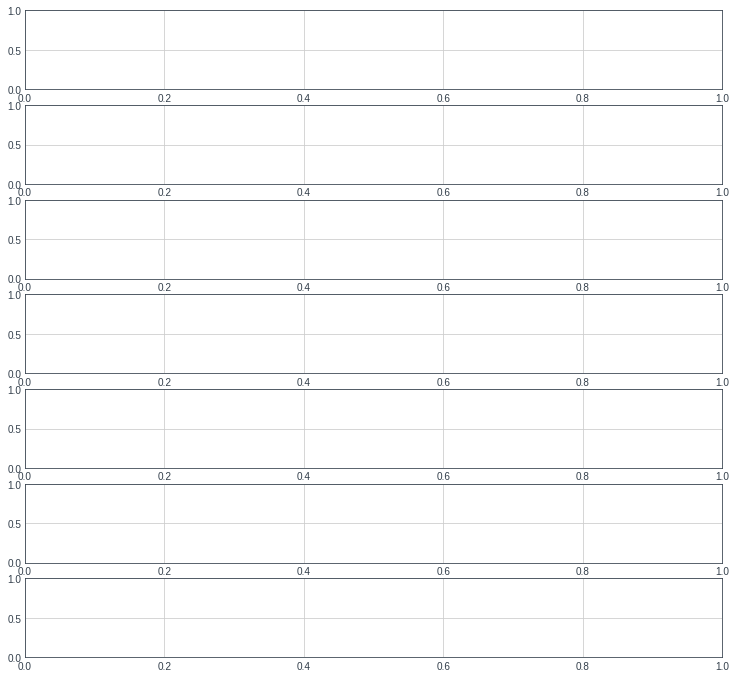

In [80]:
calplot.calplot(events,)

## Per day sale of each store for an item

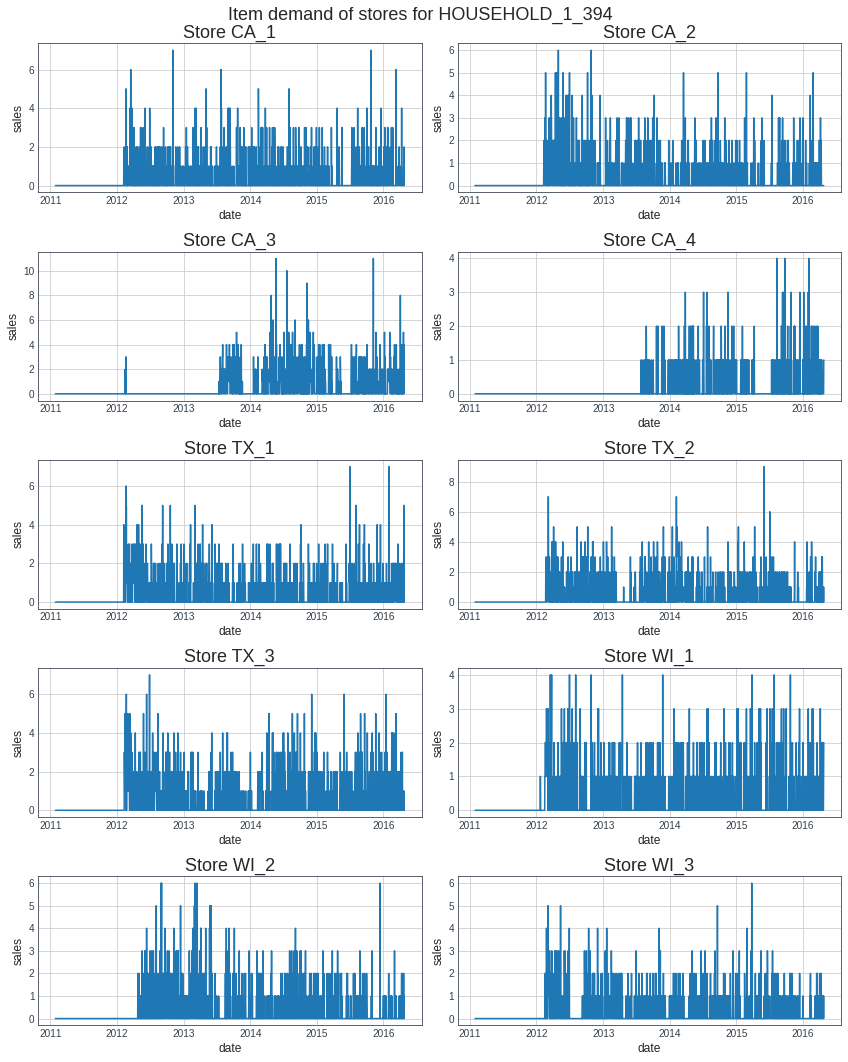

In [12]:
plot_handle.view_item_sales_store(df_part, df_cal, key)

## Average item sales over a period

### Weekly average

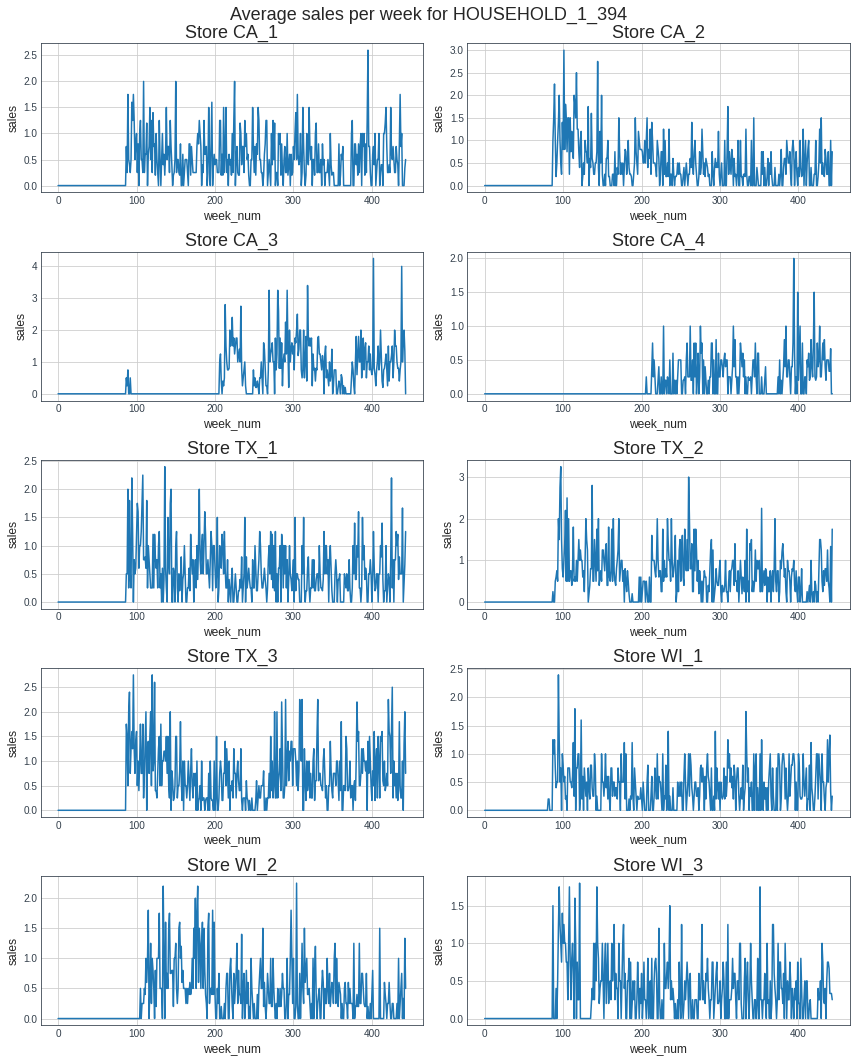

In [13]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='week', item_name=key)

### Monthly average

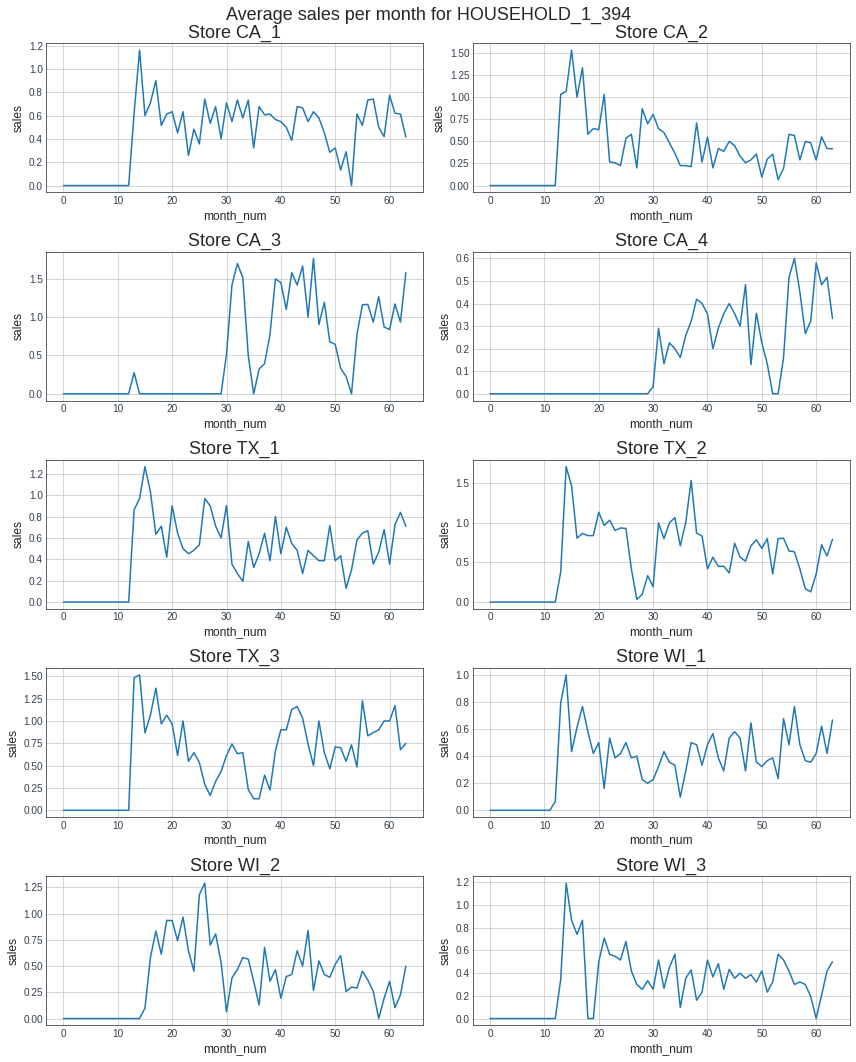

In [14]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='month', item_name=key)

## Yearly average

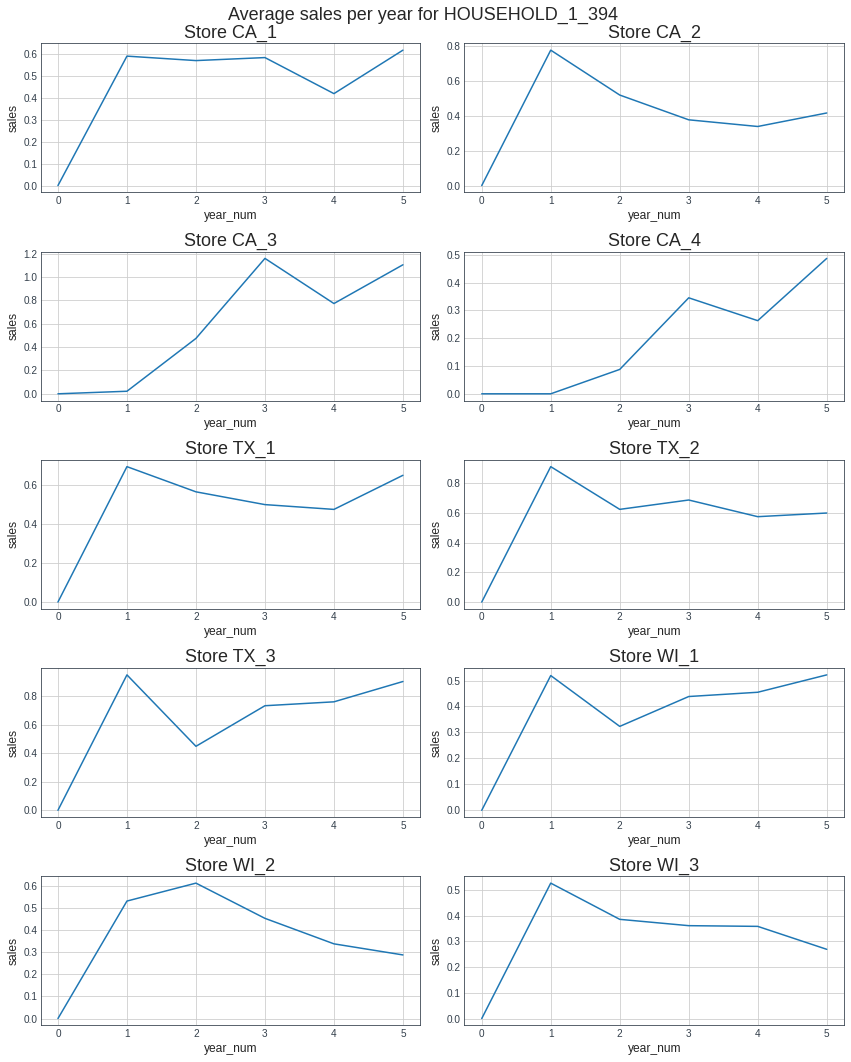

In [15]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='year', item_name=key)

# HOBBIES_1_236

In [16]:
# get item from lot_data
key = lot1_keys[3] # HOBBIES_1_236
df_part = lot1_data[key].copy(deep=True)

## Per day sale of an item

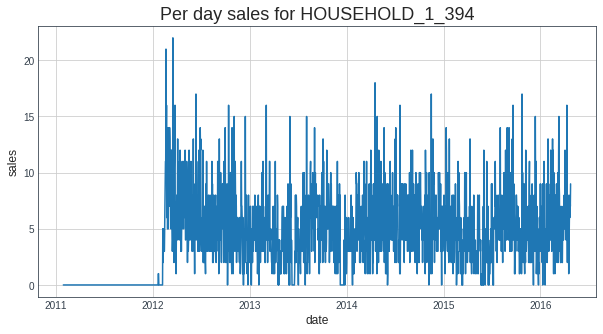

Per day sales for HOUSEHOLD_1_394 Heatmap


In [26]:
import calplot
def view_per_day_sale_item(self,
                           df: pd.DataFrame,
                           df_cal: pd.DataFrame,
                           item_name: str = "___",
                           view_calplot=True):
    """
    Visualize sales of item across each store

    Args:
        df (pd.DataFrame): DataFrame with details of sales of an item
        df_cal (pd.DataFrame) : calendar DataFrame
        item_name (str, optional): Name of item being analyzed. Defaults to "___".
        view_calplot (bool, optional) : View calendar heatmap. Defaults to True. 
    """

    # group by days and sum all sales of that day for that item
    res = df.groupby(by='day')['sales'].agg('sum').reset_index()

    # sort by days
    res['day'] = res['day'].str.replace('d_', '').astype(int)
    res.sort_values(by='day', inplace=True)

    res['day'] = 'd_' + res['day'].astype(str)

    # merge on calendar
    res = res.merge(right=df_cal, how='left', left_on='day', right_on='d')

    # convert to datetime
    res['date'] = pd.to_datetime(res['date'])

    plt.figure(figsize=[10, 5])
    plt.title(f"Per day sales for {item_name}")
    sns.lineplot(
        x='date',
        y='sales',
        data=res,
    )
    plt.show()

    if view_calplot:
        temp = res
        events = temp[['date', 'sales']]
        events.set_index(keys=['date'], inplace=True)
        events = events['sales']

        print(f"Per day sales for {item_name} Heatmap")
        return events
        print(type(events))
        calplot.calplot(events)
        plt.show()
        
e = view_per_day_sale_item(plot_handle, df_part, df_cal, item_name=key)

## Per day sale of each store for an item

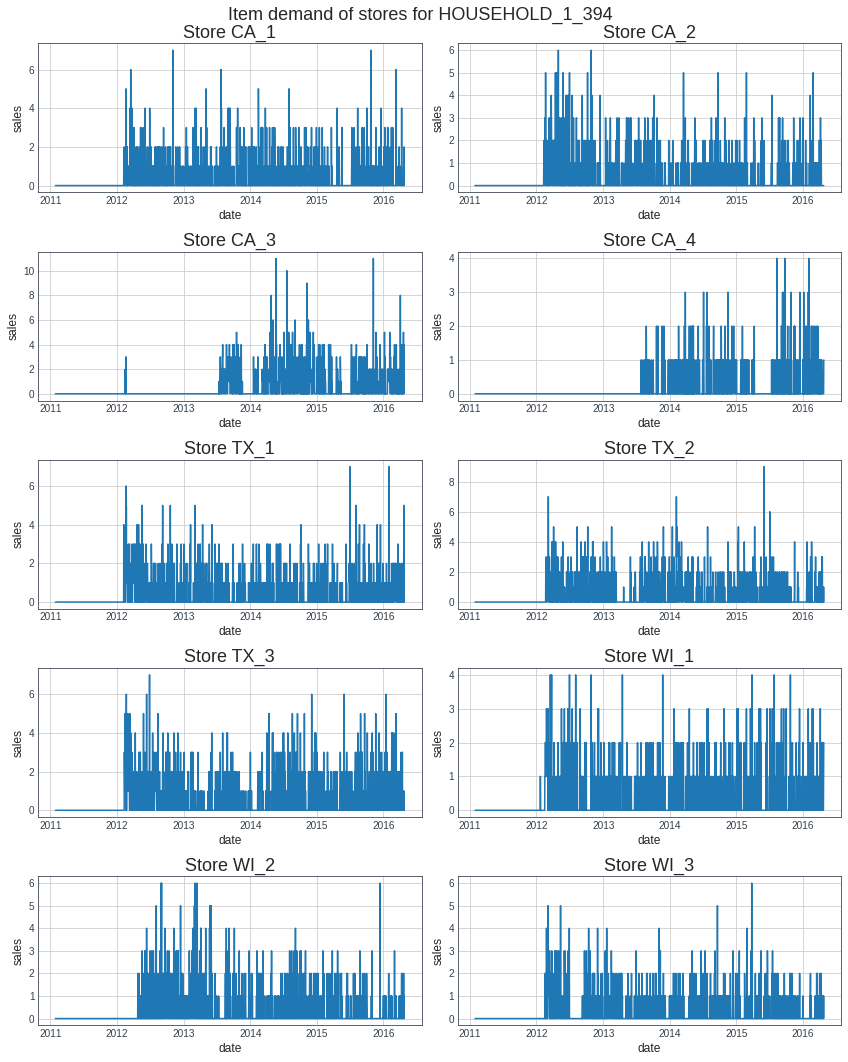

In [18]:
plot_handle.view_item_sales_store(df_part, df_cal, key)

## Average item sales over a period

### Weekly average

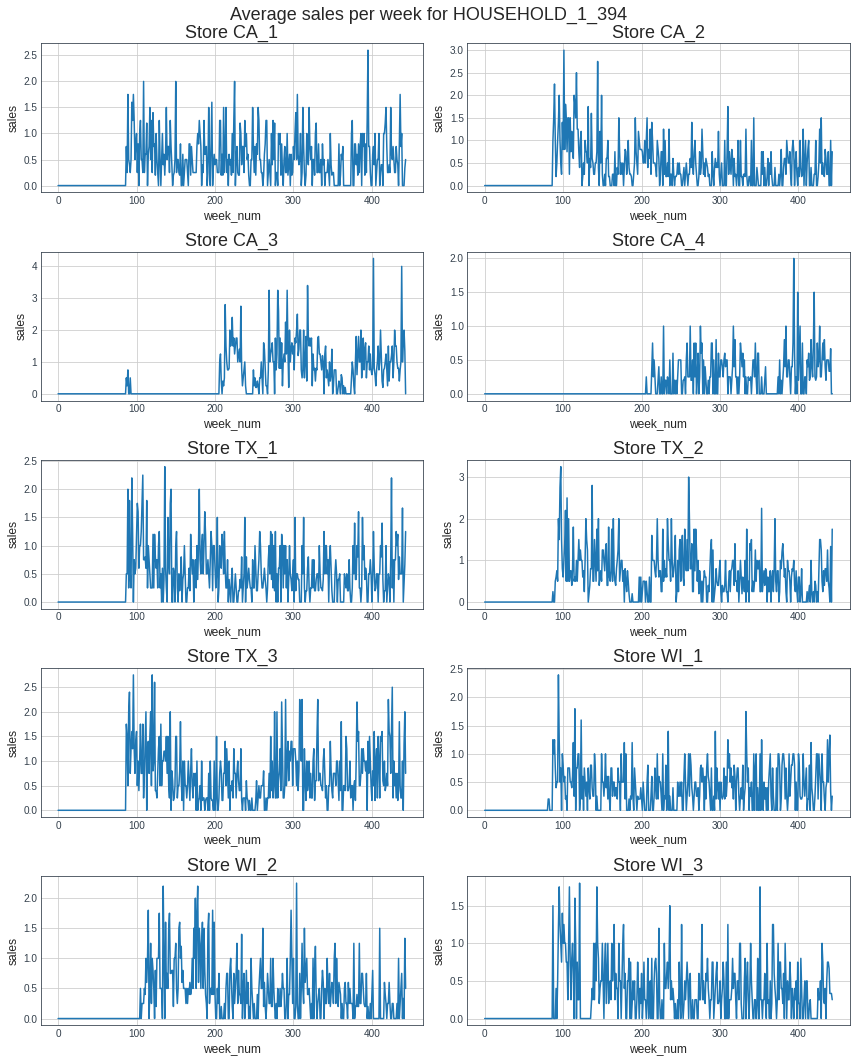

In [19]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='week', item_name=key)

### Monthly average

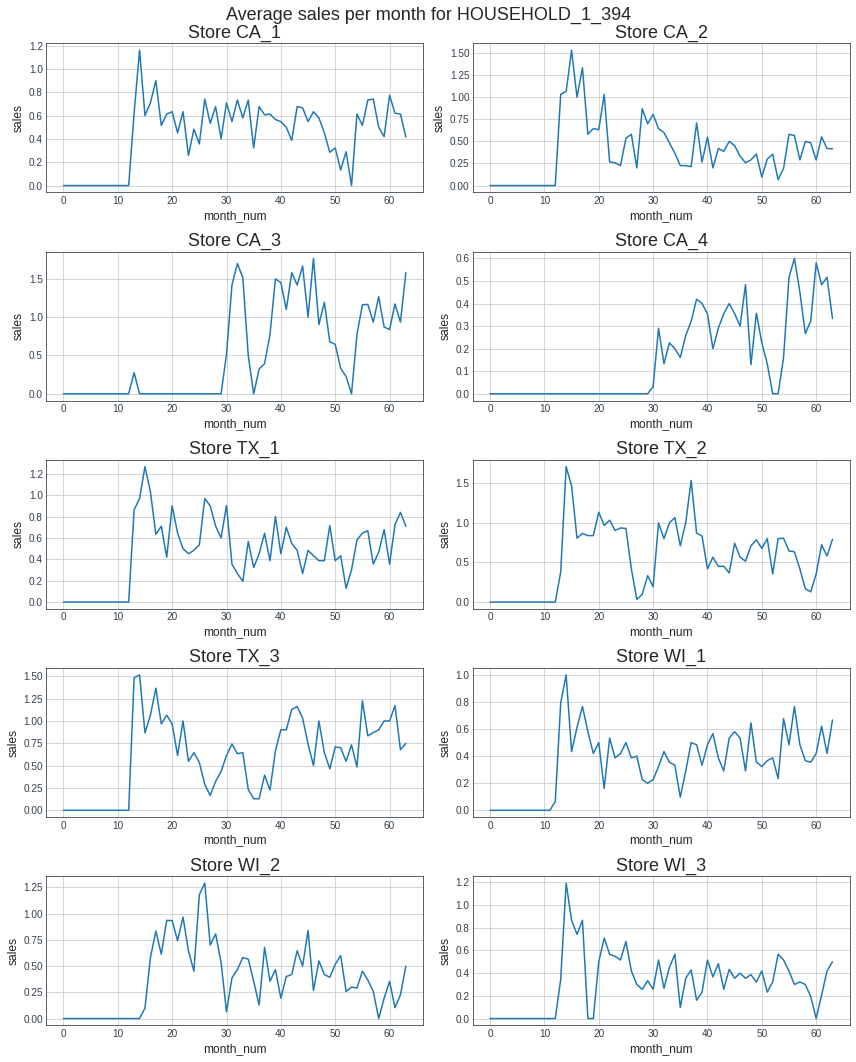

In [20]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='month', item_name=key)

## Yearly average

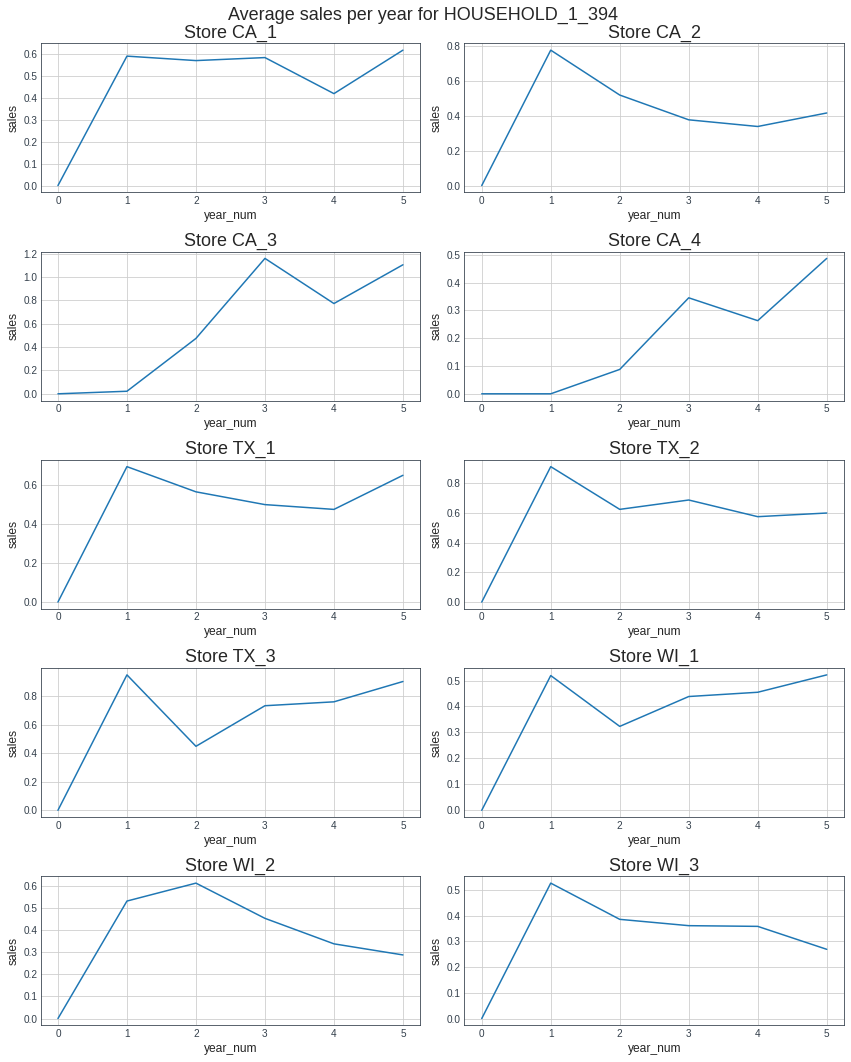

In [21]:
plot_handle.view_avg_item_sales(df_part, df_cal, period='year', item_name=key)